In [36]:
%pip install seaborn
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ATI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ATI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# df = pd.read_csv('Complete_NASA_TLX.csv', header=None)
# same but ignore the first two rows
df = pd.read_csv('Complete_NASA_TLX.csv', header=None, skiprows=2)
df.columns = ['Participant', 'Technique', 'Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']

df.Technique.unique()

array(['Eye Gaze + Hand Gesture', 'VR Controllers', 'NeuroGaze'],
      dtype=object)

In [39]:

# Assuming df is your DataFrame
matplotlib.rcParams['font.family'] = 'Times New Roman'
# Initialize an empty list for the new rows
new_rows = []

# A dictionary to temporarily store the scores for each participant
participant_scores = {}

# compute final score for each participant
for participant in df['Participant'].unique():
    pdf = df[df['Participant'] == participant]
    
    # Initialize a temporary dictionary to hold scores for each technique
    scores = {'Eye Gaze + Hand Gesture': None,  'VR Controllers': None, 'NeuroGaze': None,}
    
    for technique in pdf["Technique"].unique():
        tpdf = pdf[pdf['Technique'] == technique]
        
        # score = Mental + physical + temporal + effort + frustration + (7 - performance)
        score = tpdf['Mental'].values[0] + tpdf['Physical'].values[0] + tpdf['Temporal'].values[0] + tpdf['Effort'].values[0] + tpdf['Frustration'].values[0] + (7 - tpdf['Performance'].values[0])
        
        # Assign the score to the correct technique
        if technique == "Eye Gaze + Hand Gesture":
            scores['Eye Gaze + Hand Gesture'] = score
        elif technique == "NeuroGaze":
            scores['NeuroGaze'] = score
        elif technique == "VR Controllers":
            scores['VR Controllers'] = score
    
    # Save the scores dictionary for this participant
    participant_scores[participant] = scores

# Convert the participant_scores dictionary to a format suitable for a DataFrame
for participant, scores in participant_scores.items():
    row = {'Participant': participant}
    row.update(scores)
    new_rows.append(row)
        
# Create the DataFrame with the specified headers
aggregated_tlx_df = pd.DataFrame(new_rows)

# Print the DataFrame to check it
print(aggregated_tlx_df)

# Save to CSV
aggregated_tlx_df.to_csv("aggregated_tlx.csv", index=False)



    Participant  Eye Gaze + Hand Gesture  VR Controllers  NeuroGaze
0             2                       29              22         22
1             3                       27              21         28
2             4                        8              11         20
3             5                        7               9         13
4             6                        7               7         12
5             7                       26              20         19
6             8                       19              16         25
7             9                        5               8         12
8            10                        6               6          8
9             1                       21              29          9
10           12                       28              30         15
11           13                       27              26         12
12           14                       25              26         19
13           15                       27        

C:\Users\ATI\AppData\Local\Temp\ipykernel_5884\4163357880.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


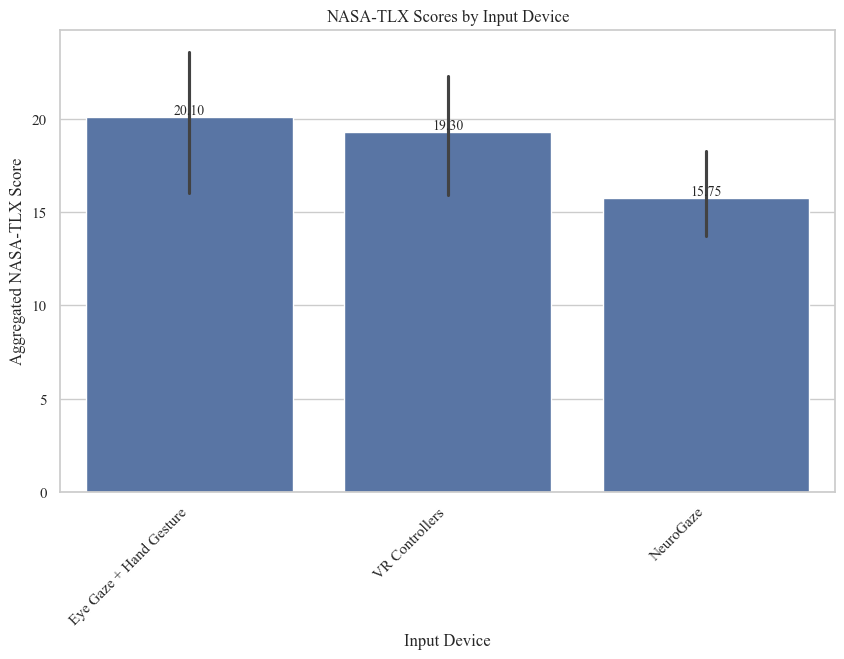

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame loaded from the CSV

# Melt the DataFrame to long format
melted_df = aggregated_tlx_df.melt(id_vars=["Participant"], 
                      var_name="Input Device", 
                      value_name="Aggregated NASA-TLX Score")

# Set the style of the plot
sns.set(style="whitegrid")

# Set global font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Create a figure and axis for better control
fig, ax = plt.subplots(figsize=(10, 6))

# Ensure the 'order' exactly matches your DataFrame's categories
order = ['Eye Gaze + Hand Gesture', 'VR Controllers', 'NeuroGaze']

# Create the bar plot
sns.barplot(x='Input Device', y='Aggregated NASA-TLX Score', data=melted_df, ax=ax, order=order, errorbar=('ci', 95))

# Adjusting plot elements for alignment and presentation
ax.set_xlabel('Input Device')
ax.set_ylabel('Aggregated NASA-TLX Score')
ax.set_title('NASA-TLX Scores by Input Device')

# Optional: Adjust tick label alignment if necessary
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Loop to add text annotations on each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,  # x position
            p.get_height(),  # y position
            '{:.2f}'.format(p.get_height()),  # text string
            fontsize=10, 
            ha='center', 
            va='bottom')

plt.show()


C:\Users\ATI\AppData\Local\Temp\ipykernel_5884\644415144.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=45, ha="right")
C:\Users\ATI\AppData\Local\Temp\ipykernel_5884\644415144.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=45, ha="right")
C:\Users\ATI\AppData\Local\Temp\ipykernel_5884\644415144.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=45, ha="right")
C:\Users\ATI\AppData\Local\Temp\ipykernel_5884\644415144.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_t

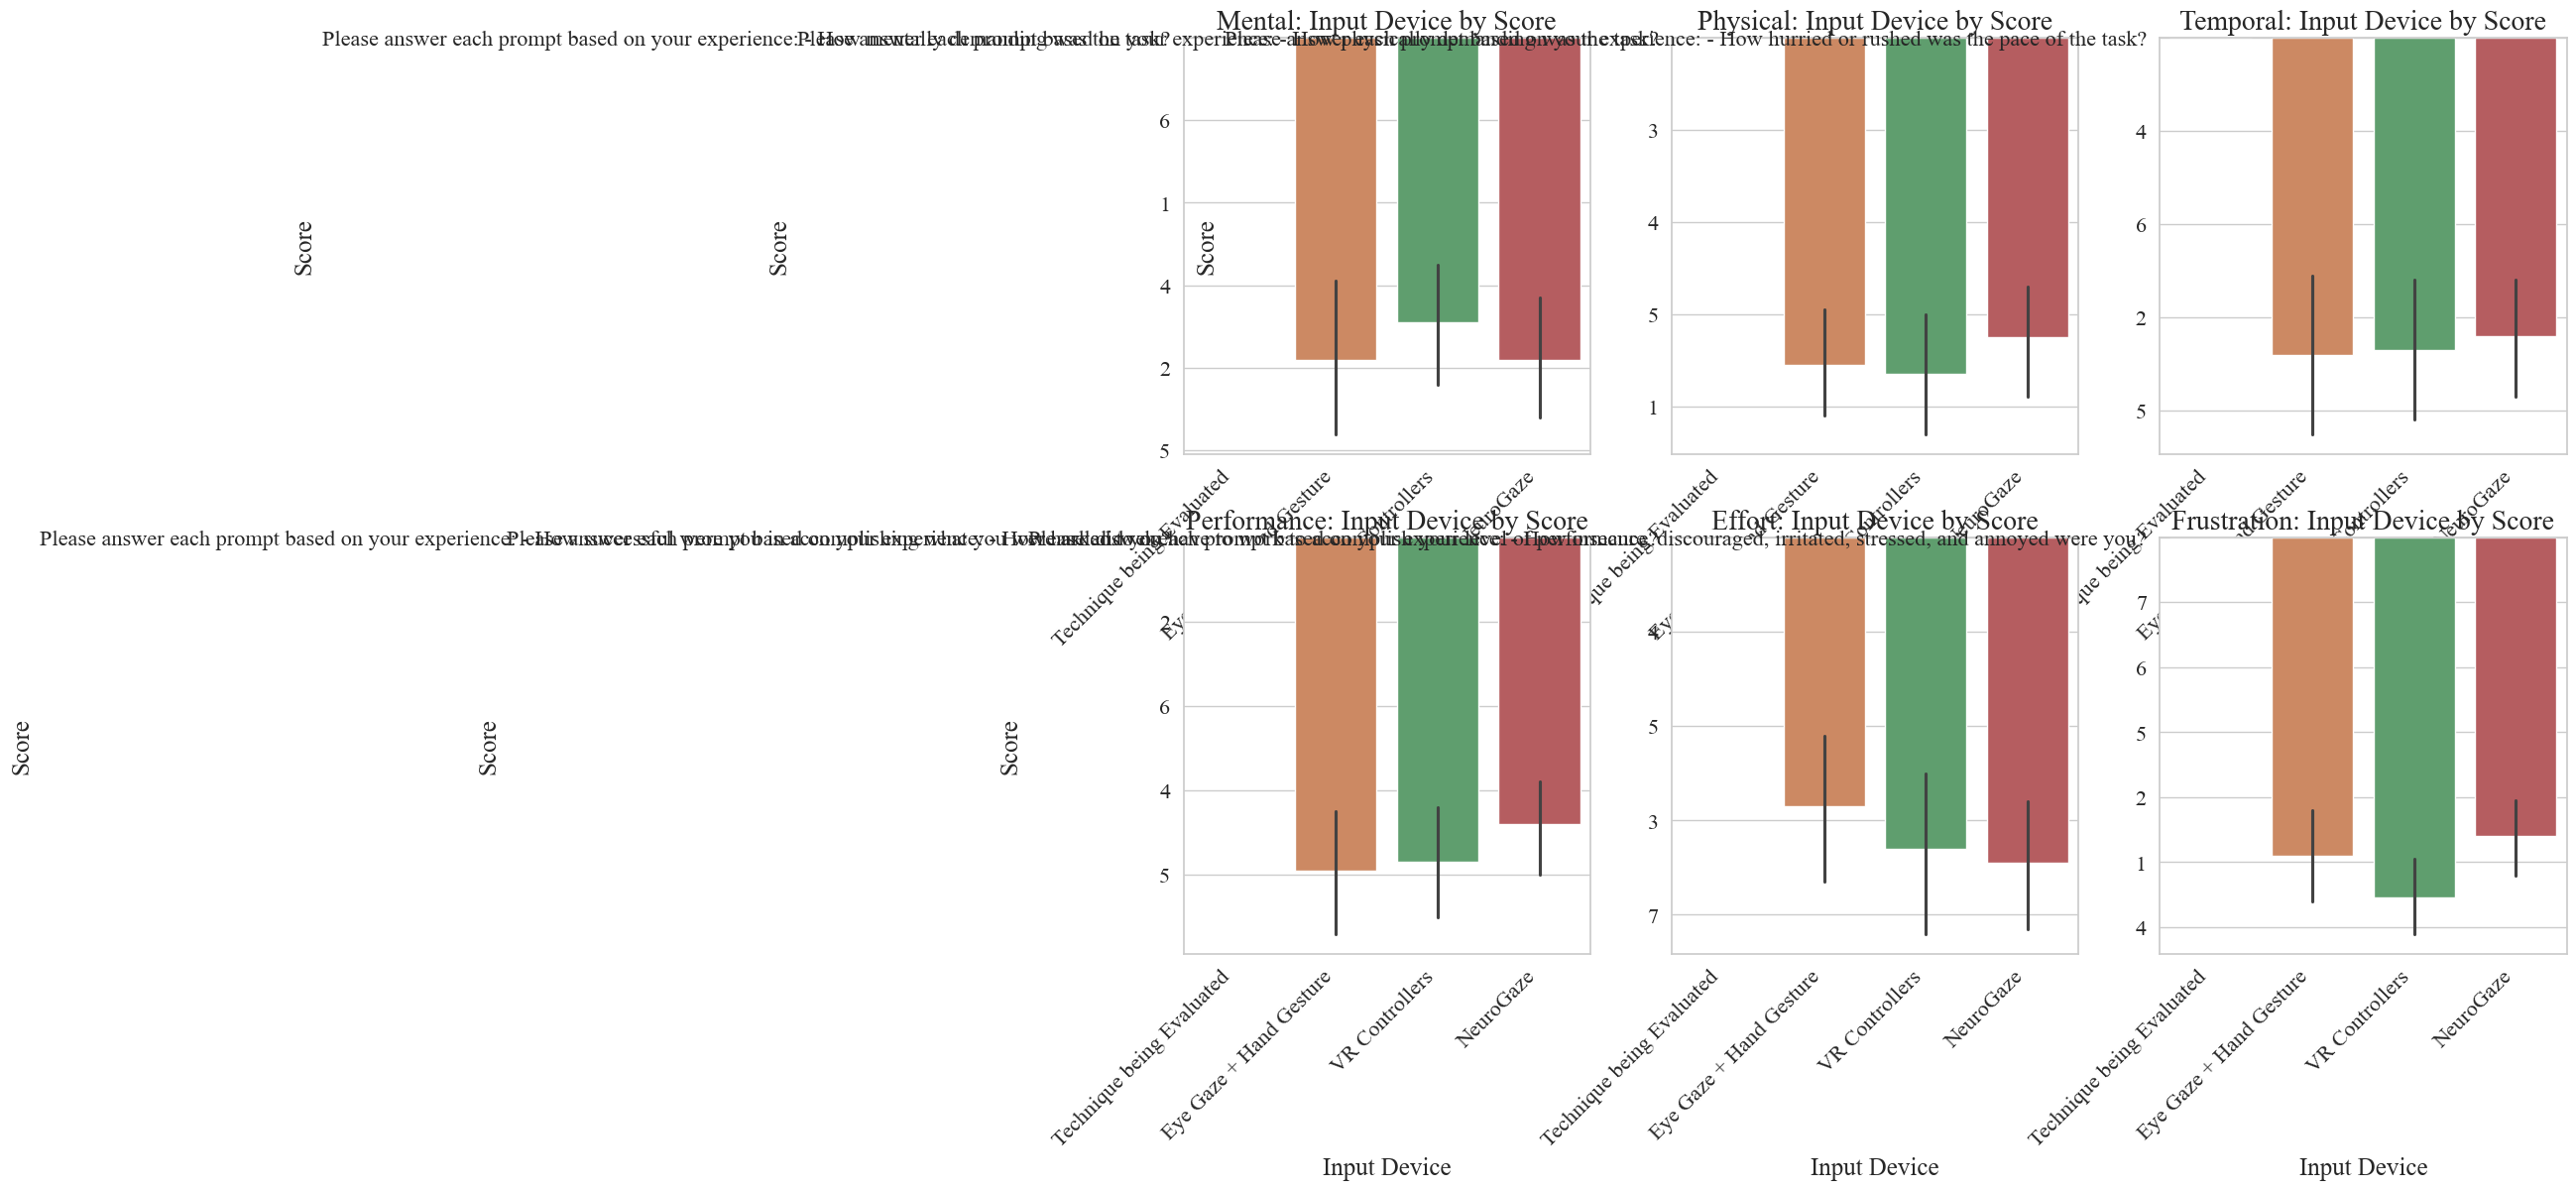

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font to Times New Roman and increase the base font size
plt.rcParams.update({
    'font.size': 16,  # Adjusting base font size
    'font.family': 'Times New Roman',
    'xtick.labelsize': 16,  # Adjusting xtick label size
    'ytick.labelsize': 16,  # Adjusting ytick label size
    'axes.titlesize': 20,  # Adjusting subplot titles size
    'axes.labelsize': 18,  # Adjusting axis label size
})

# Assuming 'df' is your DataFrame
# Example adjustment: Using 2 rows and 3 columns for subplots layout
fig, ax = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)

questions = ['Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']
for i, question in enumerate(questions):
    # Calculate row and column index
    row = i // 3
    col = i % 3
    sns.barplot(x='Technique', y=question, data=df, ax=ax[row, col], hue="Technique", errorbar=('ci', 95))
    # Set xtick labels with increased font size and rotation for better readability
    ax[row, col].set_xticklabels(ax[row, col].get_xticklabels(), rotation=45, ha="right")
    # Modify subplot title to "Question by Score"
    ax[row, col].set_title(f"{question}: Input Device by Score")
    # Set the y-axis label to "Score" for each subplot
    ax[row, col].set_ylabel("Score")
    ax[row, col].set_xlabel("Input Device")
    
plt.tight_layout(pad=1.0)
plt.show()


In [42]:
# make table for Friedman test in SPSS
# currently columns are Participant, Technique, Score
# we need the index to be Participant and columns to be Technique
pivot_df = melted_df.pivot(index='Participant', columns='Input Device', values='Aggregated NASA-TLX Score')
pivot_df.to_csv('NASA_TLX.csv')

In [43]:
# perform friedman test in python
from scipy.stats import friedmanchisquare

print(aggregated_tlx_df['NeuroGaze'])
friedmanchisquare(aggregated_tlx_df['NeuroGaze'], aggregated_tlx_df['VR Controllers'], aggregated_tlx_df['Eye Gaze + Hand Gesture'])

0     22
1     28
2     20
3     13
4     12
5     19
6     25
7     12
8      8
9      9
10    15
11    12
12    19
13    14
14    13
15    17
16    17
17    12
18    15
19    13
Name: NeuroGaze, dtype: int64


FriedmanchisquareResult(statistic=2.4473684210526496, pvalue=0.29414447801663574)

In [44]:
import pandas as pd
from scipy.stats import wilcoxon

# Assuming 'aggregated_tlx_df' is your DataFrame with the columns for each technique

# Perform the Wilcoxon signed-rank tests
results = [
    {"Comparison": "NeuroGaze vs VR Controllers", "Test Result": wilcoxon(aggregated_tlx_df['NeuroGaze'], aggregated_tlx_df['VR Controllers'])},
    {"Comparison": "NeuroGaze vs Eye Gaze + Hand Gesture", "Test Result": wilcoxon(aggregated_tlx_df['NeuroGaze'], aggregated_tlx_df['Eye Gaze + Hand Gesture'])},
    {"Comparison": "VR Controllers vs Eye Gaze + Hand Gesture", "Test Result": wilcoxon(aggregated_tlx_df['VR Controllers'], aggregated_tlx_df['Eye Gaze + Hand Gesture'])}
]

# Create a DataFrame to hold the test results
test_results_df = pd.DataFrame(results)

# Split the 'Test Result' column into 'Statistic' and 'p-Value'
test_results_df[['Statistic', 'p-Value']] = pd.DataFrame(test_results_df['Test Result'].tolist(), index=test_results_df.index)

# Drop the original 'Test Result' column as it's no longer needed
test_results_df.drop(columns=['Test Result'], inplace=True)

# Print the DataFrame to check it
print(test_results_df)

# Export the DataFrame to a CSV file
test_results_df.to_csv("aggregated_wilcoxon_test_results.csv", index=False)


                                  Comparison  Statistic   p-Value
0                NeuroGaze vs VR Controllers       53.0  0.090472
1       NeuroGaze vs Eye Gaze + Hand Gesture       42.5  0.017181
2  VR Controllers vs Eye Gaze + Hand Gesture       59.0  0.406050


C:\Users\ATI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [46]:
# df = pd.read_csv('Complete_NASA_TLX.csv', header=None)
# same but ignore the first two rows
df = pd.read_csv('Complete_NASA_TLX.csv', header=None, skiprows=2)
df.columns = ['Participant', 'Technique', 'Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']

df.Technique.unique()

# replace "Eye Gaze + Hand Gesture" with "Eye Tracking\n+ Hand Tracking"
# df['Technique'] = df['Technique'].replace('Eye Gaze + Hand Gesture', 'Eye Tracking\n+ Hand Tracking')

array(['Eye Gaze + Hand Gesture', 'VR Controllers', 'NeuroGaze'],
      dtype=object)

In [47]:
for i, question in enumerate(['Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']):
    print(question)
    print(friedmanchisquare(df[question][df['Technique'] == 'NeuroGaze'], df[question][df['Technique'] == 'VR Controllers'], df[question][df['Technique'] == 'Eye Gaze + Hand Gesture']))
    
    for j, technique1 in enumerate(df['Technique'].unique()):
        for k, technique2 in enumerate(df['Technique'].unique()):
            if technique1 == technique2 or j > k:
                continue
            print(technique1, "VS", technique2)
            w = wilcoxon(df[question][df['Technique'] == technique1], df[question][df['Technique'] == technique2])
            print(w, "sig" if w.pvalue < 0.05 else "")
            print()
    
    # print(wilcoxon(df[question][df['Technique'] == 'NeuroGaze'], df[question][df['Technique'] == 'VR Controllers']))
    # print(wilcoxon(df[question][df['Technique'] == 'NeuroGaze'], df[question][df['Technique'] == 'Eye Gaze + Hand Gesture']))
    # print(wilcoxon(df[question][df['Technique'] == 'VR Controllers'], df[question][df['Technique'] == 'Eye Gaze + Hand Gesture']))
    print()
    print("=====================================")

Mental
FriedmanchisquareResult(statistic=3.4929577464788992, pvalue=0.1743869020521774)
Eye Gaze + Hand Gesture VS VR Controllers
WilcoxonResult(statistic=14.0, pvalue=0.025828560698326456) sig

Eye Gaze + Hand Gesture VS NeuroGaze
WilcoxonResult(statistic=57.0, pvalue=0.12402359820387084) 

VR Controllers VS NeuroGaze
WilcoxonResult(statistic=89.5, pvalue=0.8237779594699384) 


Physical
FriedmanchisquareResult(statistic=11.148148148148156, pvalue=0.0037949878334789695)
Eye Gaze + Hand Gesture VS VR Controllers
WilcoxonResult(statistic=17.0, pvalue=0.8866897393567406) 

Eye Gaze + Hand Gesture VS NeuroGaze
WilcoxonResult(statistic=12.0, pvalue=0.005915605813408598) sig

VR Controllers VS NeuroGaze
WilcoxonResult(statistic=19.0, pvalue=0.018843332993424375) sig


Temporal
FriedmanchisquareResult(statistic=18.633333333333365, pvalue=8.991312184636184e-05)
Eye Gaze + Hand Gesture VS VR Controllers
WilcoxonResult(statistic=11.0, pvalue=0.02561633200258813) sig

Eye Gaze + Hand Gesture VS N

C:\Users\ATI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\ATI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [48]:
df = pd.read_csv('Complete_NASA_TLX.csv', header=None, skiprows=1)
df.columns = ['Participant', 'Technique', 'Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']


In [49]:
import pandas as pd
from scipy.stats import wilcoxon

# Assuming 'df' is your DataFrame

# Initialize a list to store each row of the final table
comparison_results = []

# Iterate through each question
for question in ['Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration']:
    # Iterate through each unique pair of techniques
    techniques = df['Technique'].unique()
    for i, technique1 in enumerate(techniques):
        for j, technique2 in enumerate(techniques):
            if technique1 == technique2 or i >= j:
                # Skip comparing a technique with itself or repeating comparisons
                continue
            
            # Perform the Wilcoxon test
            scores1 = df[question][df['Technique'] == technique1]
            scores2 = df[question][df['Technique'] == technique2]
            w, p = wilcoxon(scores1, scores2)
            
            # Prepare a dictionary for the row
            row = {
                'Question': question,
                'Technique Comparison': f"{technique1} VS {technique2}",
                'Statistic': w,
                'p-Value': p,
                'Significant': 'Yes' if p < 0.05 else 'No'
            }
            comparison_results.append(row)

# Create a DataFrame from the list of dictionaries
wilcoxon_comparisons_df = pd.DataFrame(comparison_results)

# Print the DataFrame to review the table
print(wilcoxon_comparisons_df)

# Optionally, you can save this DataFrame to a CSV for further analysis or sharing
wilcoxon_comparisons_df.to_csv("wilcoxon_comparisons.csv", index=False)


ValueError: The samples x and y must have the same length.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your data
data = {
    "Question": [
        "Mental", "Mental", "Mental", "Physical", "Physical", "Physical",
        "Temporal", "Temporal", "Temporal", "Performance", "Performance", "Performance",
        "Effort", "Effort", "Effort", "Frustration", "Frustration", "Frustration"
    ],
    "Comparison": [
        "VR Controllers VS Eye Gaze + Hand Gesture", "VR Controllers VS NeuroGaze", "Eye Gaze + Hand Gesture VS NeuroGaze",
        "VR Controllers VS Eye Gaze + Hand Gesture", "VR Controllers VS NeuroGaze", "Eye Gaze + Hand Gesture VS NeuroGaze",
        "VR Controllers VS Eye Gaze + Hand Gesture", "VR Controllers VS NeuroGaze", "Eye Gaze + Hand Gesture VS NeuroGaze",
        "VR Controllers VS Eye Gaze + Hand Gesture", "VR Controllers VS NeuroGaze", "Eye Gaze + Hand Gesture VS NeuroGaze",
        "VR Controllers VS Eye Gaze + Hand Gesture", "VR Controllers VS NeuroGaze", "Eye Gaze + Hand Gesture VS NeuroGaze",
        "VR Controllers VS Eye Gaze + Hand Gesture", "VR Controllers VS NeuroGaze", "Eye Gaze + Hand Gesture VS NeuroGaze"
    ],
    "Statistic": [
        14.0, 89.5, 57.0, 17.0, 19.0, 12.0,
        11.0, 6.5, 7.0, 16.0, 43.0, 61.5,
        23.0, 35.5, 55.0, 22.0, 38.5, 54.0
    ],
    "p-Value": [
        0.025829, 0.823778, 0.124024, 0.88669, 0.018843, 0.005916,
        0.025616, 0.001364, 0.002256, 0.03651, 0.098037, 0.468744,
        0.352901, 0.15799, 0.492717, 0.565039, 0.968157, 0.716875
    ],
    "Significant": [
        "Yes", "No", "No", "No", "Yes", "Yes",
        "Yes", "Yes", "Yes", "Yes", "No", "No",
        "No", "No", "No", "No", "No", "No"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a figure for the table
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')

plt.subplots_adjust(left=0.2, bottom=0.2)
plt.savefig("table_image.png", dpi=300)  # Save the table as an image
plt.show()
